In [12]:
# --- Standard Library ---

import math

# --- Third-Party Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, font_manager as fm
from astropy.io import fits
from scipy.stats import stats, expon, erlang
from scipy.optimize import curve_fit
from tqdm import tqdm  # progress bar
from sklearn.cluster import DBSCAN
from scipy.stats import kstest, gamma
import matplotlib.patches as mpatches
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import gridspec
from tqdm import tqdm


# --- Global Settings ---
np.set_printoptions(suppress=True, precision=6)

# --- Load custom font --- 
custom_font = fm.FontProperties(
    fname="/usr/share/fonts/dejavu-serif-fonts/DejaVuSerifCondensed.ttf"
)

# --- Apply global Matplotlib settings --- 
plt.rcParams.update({
    "font.family": custom_font.get_name(),
    "mathtext.fontset": "stix",
    "font.size": 12,
    "figure.dpi": 150
})


In [37]:
from astropy.io import fits
import pandas as pd

# Load FITS
hdul = fits.open("asu.fit")

# The ASCII table is in extension 1
data = hdul[1].data

# Convert to pandas DataFrame
df = pd.DataFrame(data)
display(df)

,TIC,DatePk,FluxPk,Energy,Duration
0,79403675,1343.6906,4.100000e+31,3.100000e+34,2279.95
1,79403675,1349.9057,3.300000e+31,2.600000e+35,15959.54
2,139233425,1333.8503,3.900000e+31,2.500000e+34,1320.03
3,147302016,1327.7118,7.900000e+31,4.900000e+34,1800.01
4,147302016,1332.2674,2.100000e+31,4.800000e+33,480.00
...,...,...,...,...,...
1211,140579674,1561.3520,4.000000e+31,1.300000e+34,600.01
1212,140579674,1606.9209,1.400000e+32,2.300000e+35,4440.08
1213,140579674,1675.8079,5.500000e+31,3.400000e+34,1080.00
1214,220398321,1501.8929,5.900000e+31,2.800000e+34,719.98


In [7]:
counts = df['TIC'].value_counts()
valid_ids = counts[counts >= 10].index

In [8]:
filtered_df = df[df['TIC'].isin(valid_ids)]

In [9]:
len(filtered_df)

312

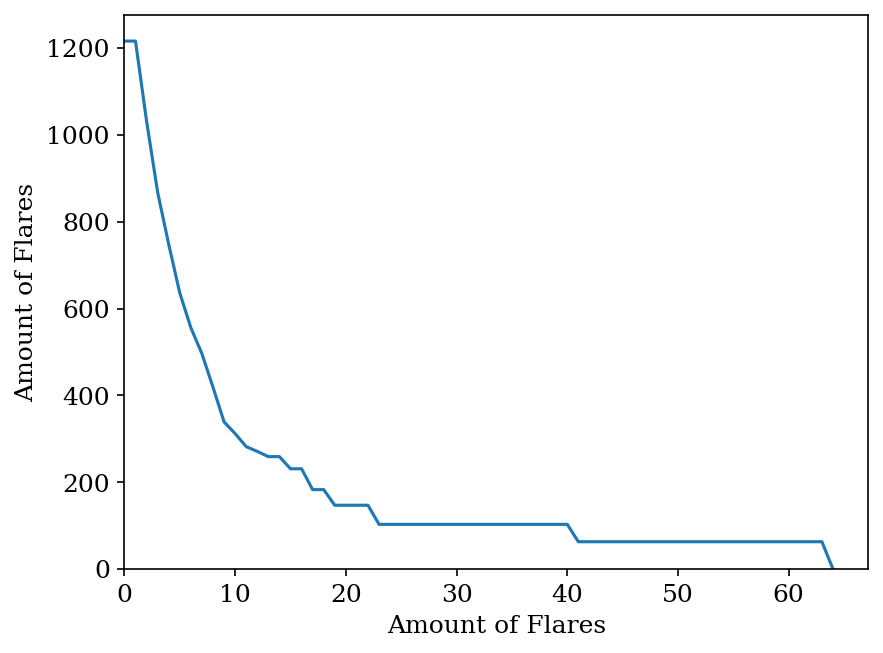

In [32]:
amount = []
for i in range(65):
    valid_ids = counts[counts >= i].index
    filtered_df = df[df['TIC'].isin(valid_ids)]
    amount.append(len(filtered_df))
    
plt.plot(range(65),amount)
plt.ylim(0)
plt.xlim(0)
plt.xlabel('Amount of Flares')
plt.ylabel('Amount of Flares')
plt.show()

4


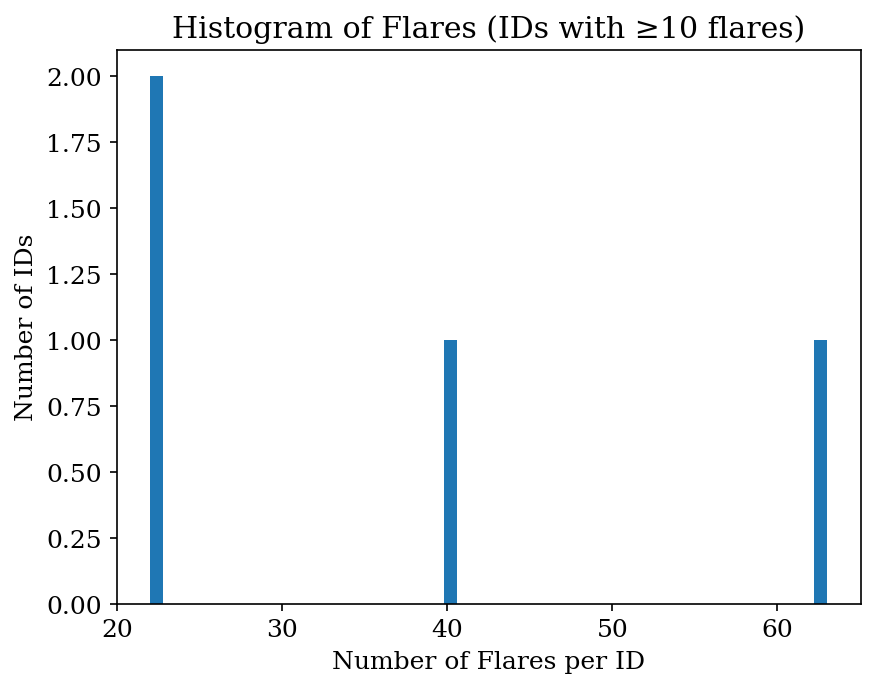

In [36]:
import matplotlib.pyplot as plt

# Count flares per TIC ID
counts = df['TIC'].value_counts()

# Filter IDs with at least 10 flares
counts_10plus = counts[counts >= 20]
print(len(counts_10plus))

# Plot histogram
plt.hist(counts_10plus, bins=53)
plt.xlabel("Number of Flares per ID")
plt.ylabel("Number of IDs")
plt.title("Histogram of Flares (IDs with ≥10 flares)")
plt.show()

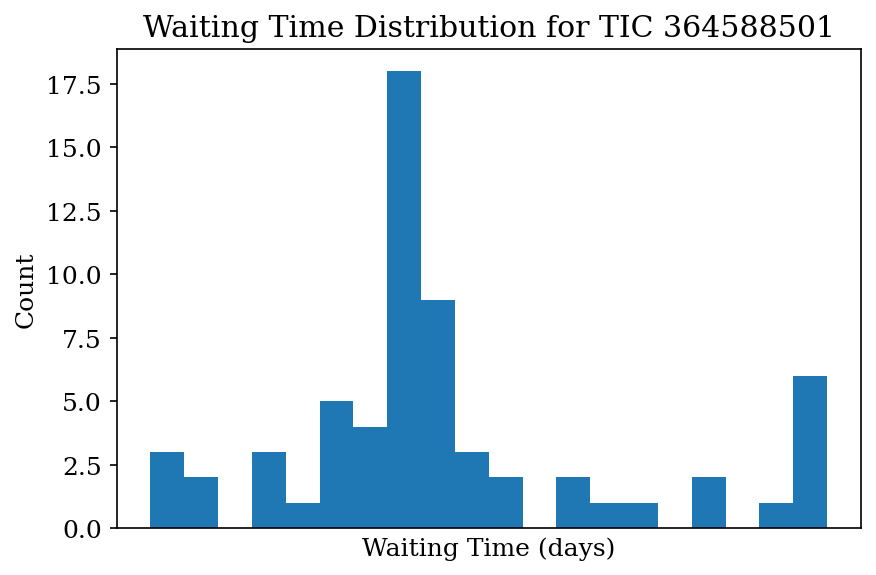

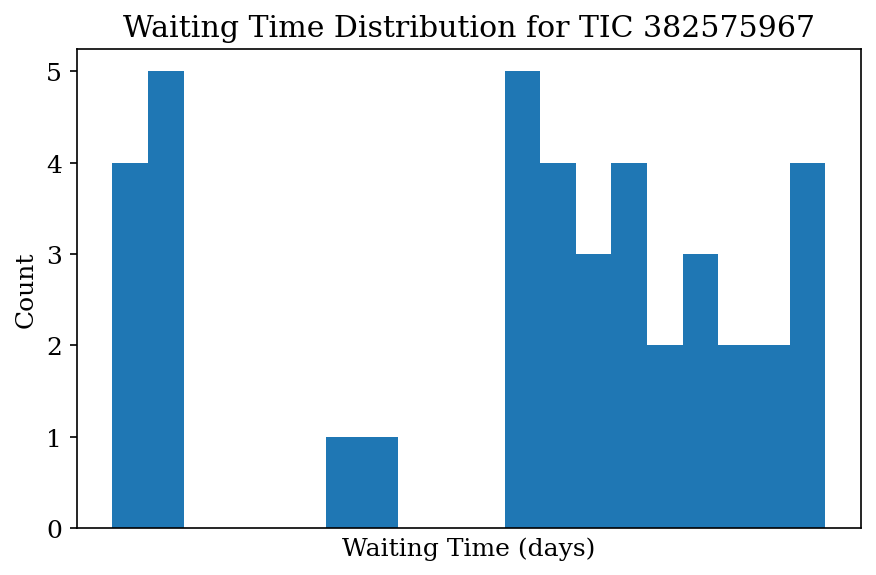

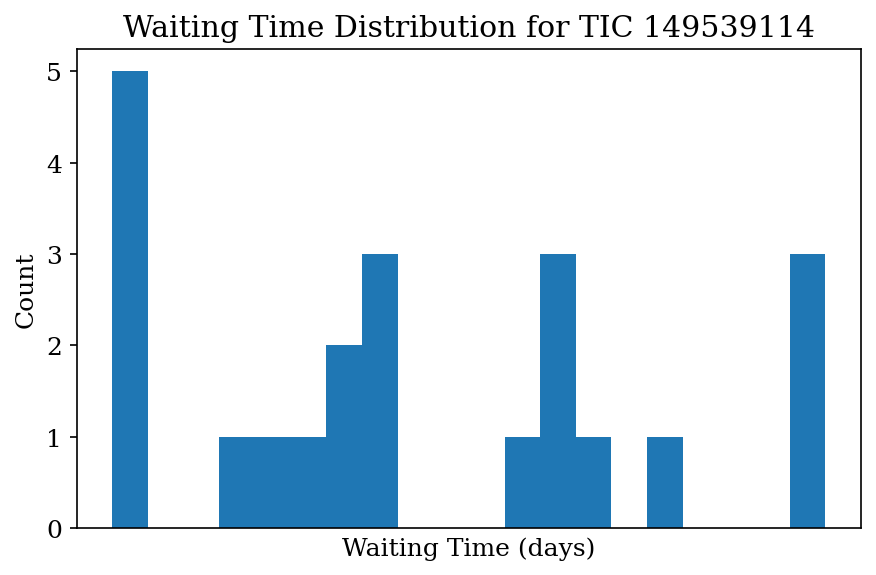

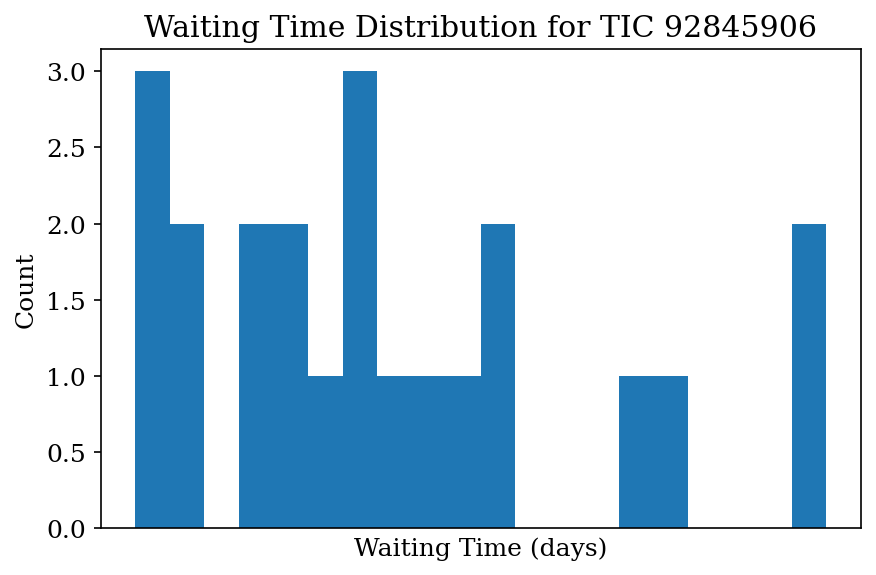

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Count flares per TIC ID
counts = df['TIC'].value_counts()

# Filter IDs with at least 20 flares
valid_ids = counts[counts >= 20].index

for tic in valid_ids:
    # Extract and sort dates
    sub = df[df['TIC'] == tic].sort_values("DatePk")

    # Ensure DatePk is datetime (skip if already correct)
    sub["DatePk"] = pd.to_datetime(sub["DatePk"])

    # Compute waiting times in days
    waiting_times = sub["DatePk"]
    waiting_times = waiting_times.dropna()

    # Plot histogram
    plt.figure(figsize=(6,4))
    plt.hist(waiting_times, bins=20)
    plt.title(f"Waiting Time Distribution for TIC {tic}")
    plt.xlabel("Waiting Time (days)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [64]:
import lightkurve as lk
search_result = lk.search_lightcurve("TIC 364588501", mission="TESS")
display(search_result)

In [63]:
display(search_result)

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,SPOC,120,364588501,0.0
1,TESS Sector 01,2018,SPOC,120,364588501,0.0
2,TESS Sector 02,2018,SPOC,120,364588501,0.0
3,TESS Sector 03,2018,SPOC,120,364588501,0.0
4,TESS Sector 04,2018,SPOC,120,364588501,0.0
5,TESS Sector 05,2018,SPOC,120,364588501,0.0
6,TESS Sector 07,2019,SPOC,120,364588501,0.0
7,TESS Sector 13,2019,SPOC,120,364588501,0.0
8,TESS Sector 12,2019,SPOC,120,364588501,0.0


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

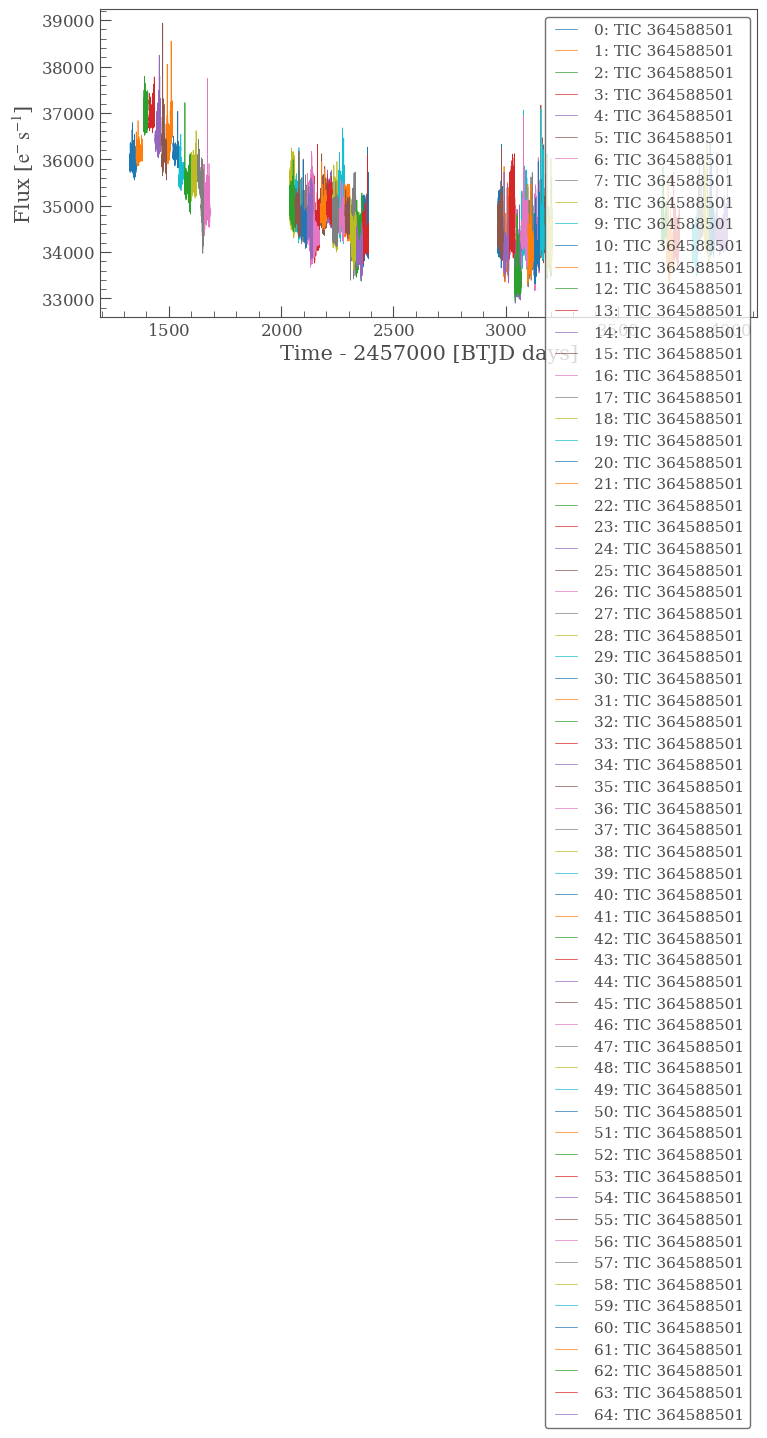

In [68]:
lc = lk.search_lightcurve("TIC 364588501", mission="TESS", author="SPOC").download_all()
lc.plot()


AttributeError: object has no attribute find_flares

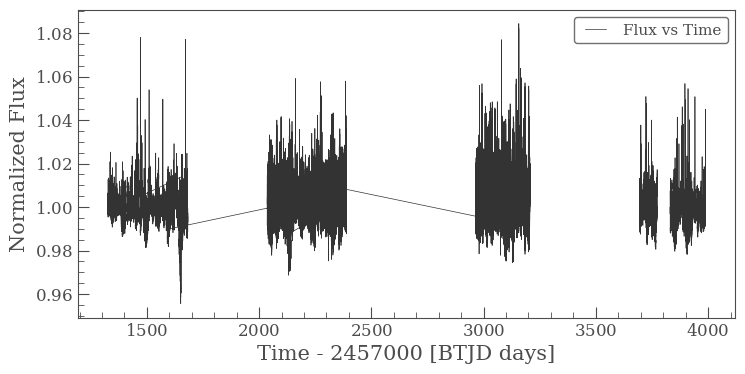

In [69]:
import lightkurve as lk

# Download, stitch, normalize
lc = (
    lk.search_lightcurve("TIC 364588501", mission="TESS", author="SPOC")
      .download_all()
      .stitch()
      .normalize()
)

# Plot time vs normalized flux
lc.plot(label="Flux vs Time")

# Detect flares
flares = lc.find_flares()

# Highlight flares
lc.plot()
lc[flares["mask"]].scatter("time", "flux", color="red")

# Show flare times
flare_times = lc.time[flares["mask"]]
print("Flare times:", flare_times)


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

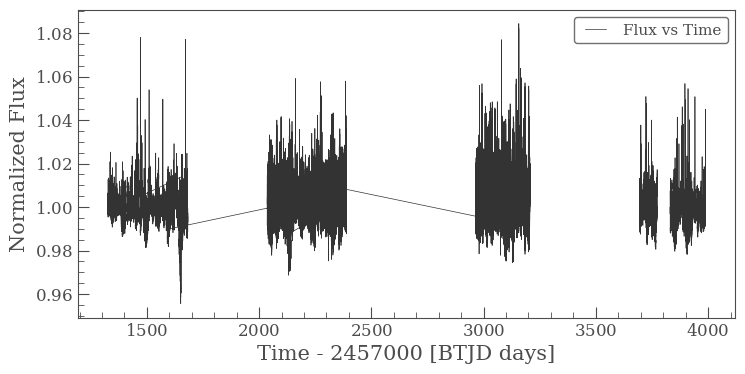

In [70]:
lc.plot(label="Flux vs Time")